In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Important Library Import

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
import seaborn

Dataset load

In [4]:
df=pd.read_csv("/content/drive/MyDrive/NSU/HAR/AllData.csv")

In [5]:
df.head(200)

,Time,Acc_x,Acc_y,Acc_z,Gry_x,Gry_y,Gry_Z,Person,Class
0,1.560000e+12,0.499756,0.798584,-0.313110,-16.768293,-10.091463,11.189024,4,Eating
1,1.560000e+12,0.497314,0.826172,-0.312622,-6.981707,-11.310976,10.731707,4,Eating
2,1.560000e+12,0.495605,0.825562,-0.313477,-5.823171,-11.402439,3.993902,4,Eating
3,1.560000e+12,0.493408,0.823242,-0.314697,-5.091463,-11.067073,6.890244,4,Eating
4,1.560000e+12,0.495605,0.819336,-0.315552,-4.115854,-11.189024,16.890244,4,Eating
...,...,...,...,...,...,...,...,...,...
195,1.560000e+12,-0.415161,0.886719,-0.390259,-4.024390,-3.384146,22.408537,4,Eating
196,1.560000e+12,-0.360596,0.836304,-0.378174,-18.506098,4.451220,3.993902,4,Eating
197,1.560000e+12,-0.408447,0.833862,-0.339233,-17.713415,6.463415,-1.463415,4,Eating
198,1.560000e+12,-0.367920,0.877563,-0.336914,-8.780488,1.615854,8.628049,4,Eating


In [6]:
df=df.drop('Person',axis=1)
df=df.drop('Time',axis=1)

In [7]:
df

,Acc_x,Acc_y,Acc_z,Gry_x,Gry_y,Gry_Z,Class
0,0.499756,0.798584,-0.313110,-16.768293,-10.091463,11.189024,Eating
1,0.497314,0.826172,-0.312622,-6.981707,-11.310976,10.731707,Eating
2,0.495605,0.825562,-0.313477,-5.823171,-11.402439,3.993902,Eating
3,0.493408,0.823242,-0.314697,-5.091463,-11.067073,6.890244,Eating
4,0.495605,0.819336,-0.315552,-4.115854,-11.189024,16.890244,Eating
...,...,...,...,...,...,...,...
72089,-0.945923,-0.182861,0.105103,-70.457317,-11.829268,11.463415,Walking
72090,-0.898315,-0.176880,0.078857,-71.280488,-11.890244,10.884146,Walking
72091,-0.863159,-0.199097,0.086548,-71.676829,-19.390244,-1.006098,Walking
72092,-0.904907,-0.189941,0.088989,-58.963415,-10.152439,25.731707,Walking


Dataset shape (Number of row, number of column)

In [8]:
df.shape

(72094, 7)

label is the target column which we need to predict

In [9]:
df['Class'].value_counts()

Speak and Walk    18673
Staying           16453
Walking           14541
Speaking          12867
Eating             9560
Name: Class, dtype: int64

In [10]:
df.isnull().sum() #find missing data

Acc_x    0
Acc_y    0
Acc_z    0
Gry_x    0
Gry_y    0
Gry_Z    0
Class    0
dtype: int64

In [11]:
df.isnull().values.any() #no missing data

False

In [12]:
df.describe() #feature engineering 

,Acc_x,Acc_y,Acc_z,Gry_x,Gry_y,Gry_Z
count,72094.000000,72094.000000,72094.000000,72094.000000,72094.000000,72094.000000
mean,-0.447154,0.402126,-0.189126,-2.895353,-0.584548,-0.605051
std,0.572069,0.465418,0.210580,42.258991,41.297331,27.830226
min,-1.283447,-1.066040,-1.184326,-588.658537,-664.634146,-340.792683
25%,-0.863892,-0.031494,-0.349243,-11.615854,-10.091463,-8.864329
50%,-0.743408,0.556519,-0.214478,-5.274390,0.000000,1.006098
75%,-0.036987,0.782440,-0.057495,4.359756,4.756098,8.445122
max,1.146362,1.199951,0.564331,414.878049,625.335366,504.054878


In [13]:
df.corr() #feature selection

,Acc_x,Acc_y,Acc_z,Gry_x,Gry_y,Gry_Z
Acc_x,1.000000,0.576228,-0.427687,0.047156,0.064115,0.018388
Acc_y,0.576228,1.000000,-0.749424,-0.033066,0.006125,0.054869
Acc_z,-0.427687,-0.749424,1.000000,0.041120,-0.007340,-0.028219
Gry_x,0.047156,-0.033066,0.041120,1.000000,0.114890,-0.113659
Gry_y,0.064115,0.006125,-0.007340,0.114890,1.000000,-0.383033
Gry_Z,0.018388,0.054869,-0.028219,-0.113659,-0.383033,1.000000


Feature Selection heatmap

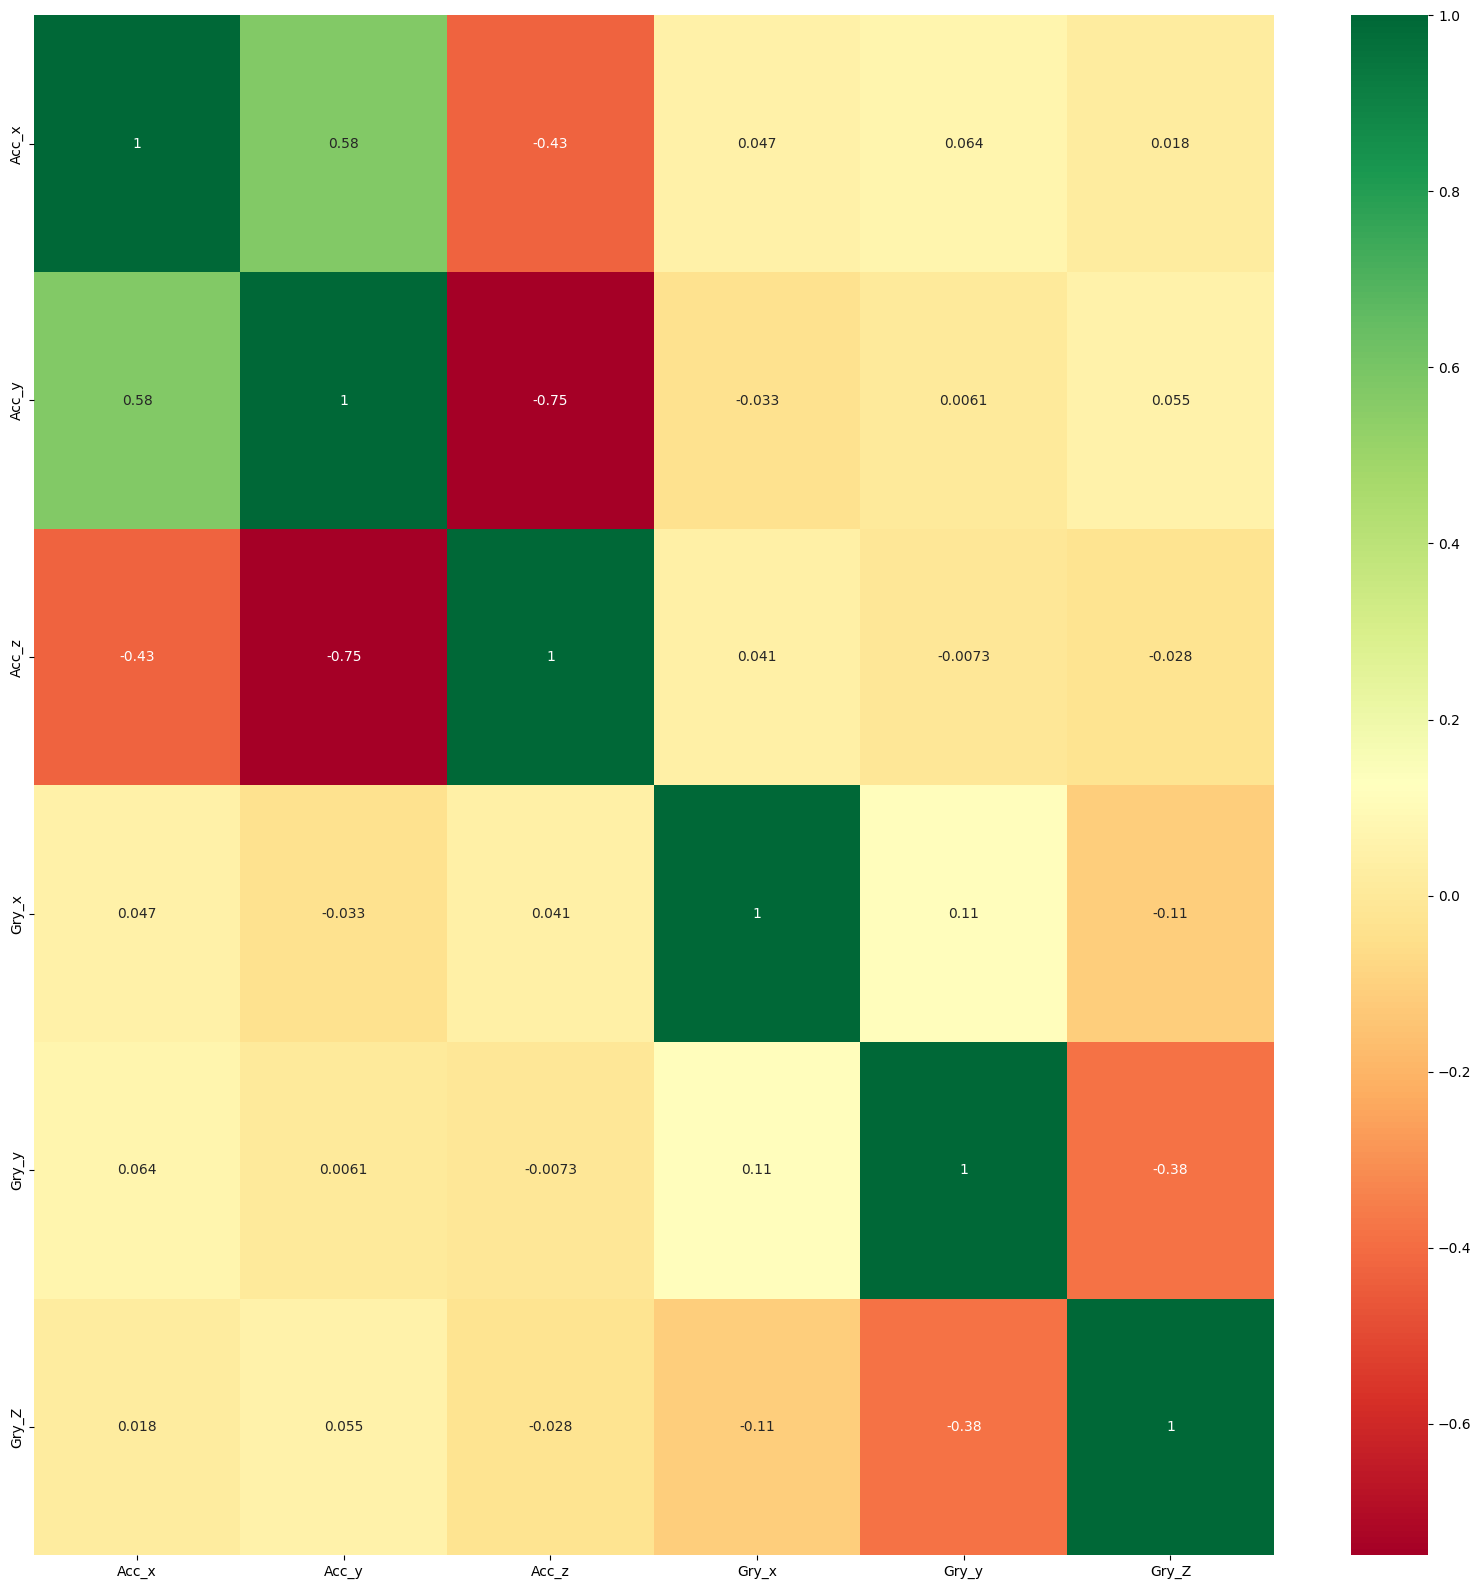

In [14]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Extract statistical features

In [15]:
# Extract the accelerometer and gyroscope data into separate arrays
acc_data = df[['Acc_x', 'Acc_y', 'Acc_z']].values
gyro_data = df[['Gry_x', 'Gry_y', 'Gry_Z']].values


In [16]:
from scipy.stats import skew, kurtosis

In [17]:
data=df

In [25]:
# function to compute statistical features
def compute_features(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    min = np.min(data, axis=0)
    max = np.max(data, axis=0)
    rms = np.sqrt(np.mean(np.square(data), axis=0))
    skewness = skew(data, axis=0)
    kurtosis_ = kurtosis(data, axis=0)
    features = []
    for f in [mean, std, (max-min), rms, skewness, kurtosis_]:
        if isinstance(f, float):
            features.append(f)
        else:
            features.extend(f.flatten())
    return features

In [26]:
# compute features for accelerometer and gyroscope data
acc_features = np.apply_along_axis(compute_features, 1, acc_data)
gyro_features = np.apply_along_axis(compute_features, 1, gyro_data)


In [27]:
# concatenate accelerometer and gyroscope features
features = np.concatenate([acc_features, gyro_features], axis=1)

In [28]:
features

array([[ 0.32840983,  0.46974154,  1.11169434, ..., 13.01547207,
         0.54441885, -1.5       ],
       [ 0.33695475,  0.47853898,  1.13879394, ...,  9.86326431,
         0.59937443, -1.5       ],
       [ 0.33589681,  0.47852696,  1.13903809, ...,  7.74330226,
         0.32199616, -1.5       ],
       ...,
       [-0.325236  ,  0.39784353,  0.94970703, ..., 42.87408559,
        -0.51243437, -1.5       ],
       [-0.33528646,  0.41857014,  0.99389649, ..., 37.60264638,
        -0.18429549, -1.5       ],
       [-0.33569336,  0.43961482,  1.02880859, ..., 36.77338206,
        -0.25090006, -1.5       ]])

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [32]:
labels=df['Class']

In [33]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)


In [34]:
# standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [35]:
# train and test support vector machine classifier
svm = SVC(kernel='rbf', C=1, gamma='auto')
svm.fit(X_train, y_train)
svm_acc = svm.score(X_test, y_test)

In [36]:
# train and test random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_acc = rf.score(X_test, y_test)

In [37]:
print('SVM accuracy: {:.3f}'.format(svm_acc))
print('Random forest accuracy: {:.3f}'.format(rf_acc))

SVM accuracy: 0.749
Random forest accuracy: 0.817
